In [2]:
%run util.py

We consider a 2-D linear ODE system,

$$
\mathbf{y'}(t) = \mathbf{A} \mathbf{y}(t)
$$

# Real, distinct Eigenvalues

## Sink (both eigenvalues are positive)

In [3]:
A = np.array([[2., 1.], 
              [0., 5.]])
lm, u = lin.eig(A)
lm, u

(array([2.+0.j, 5.+0.j]),
 array([[1.        , 0.31622777],
        [0.        , 0.9486833 ]]))

In [4]:
def dX_dt(X, t=0):
    return np.array([ 2.0 *X[0]  + 1.0*X[1] ,
                      0.0 *X[0]  + 5.0*X[1]  ])

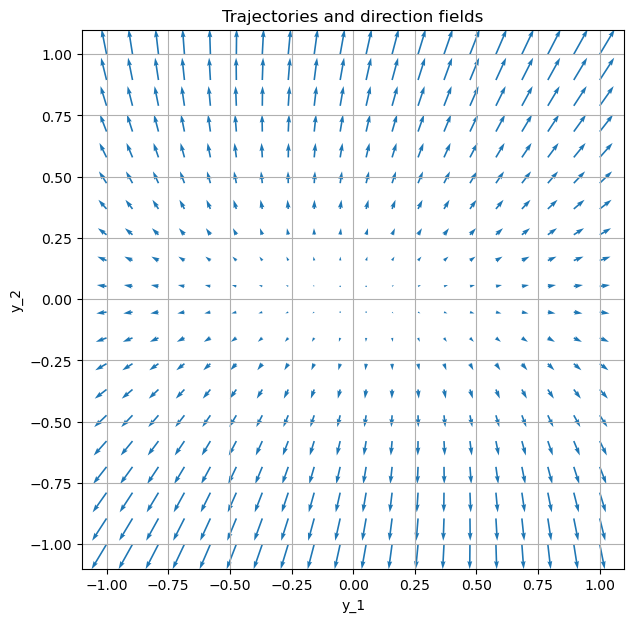

In [5]:
vField(-1, 1, -1, 1, dX_dt, Norm = False)

In [6]:
t = np.linspace(0, 2.0, 200)
X, infodict = solveODE(dX_dt, [0.5, 0.25], t)

y1, y2 = X.T
infodict['message']

'Integration successful.'

Text(0, 0.5, '$y_1, y_2$')

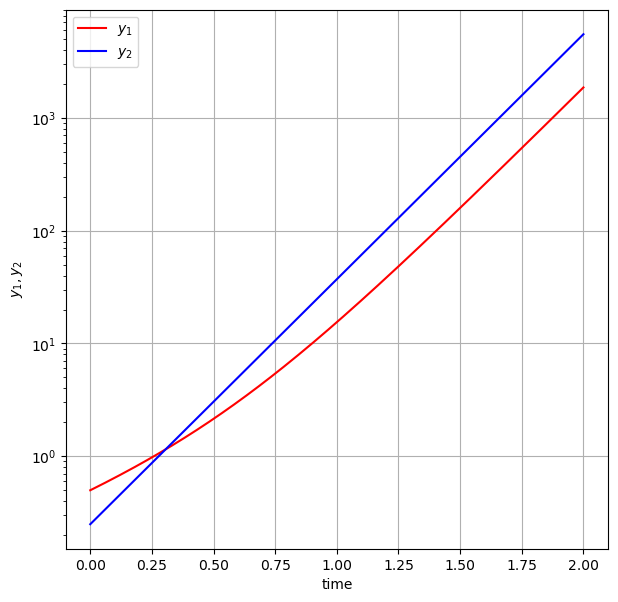

In [7]:
plt.semilogy(t, y1, 'r-', label='$y_1$')
plt.semilogy(t, y2  , 'b-', label='$y_2$')
plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('$y_1, y_2$')

### Special Case: Orthogonal Eigenvectors

In [45]:
A = np.array([[2., 0.], 
              [0., 5.]])
lm, u = lin.eig(A)
lm, u

(array([2.+0.j, 5.+0.j]),
 array([[1., 0.],
        [0., 1.]]))

In [48]:
def dX_dt(X, t=0):
    return np.array([ 2.0 *X[0]  + .0*X[1] ,
                      0.0 *X[0]  + 5.0*X[1]  ])

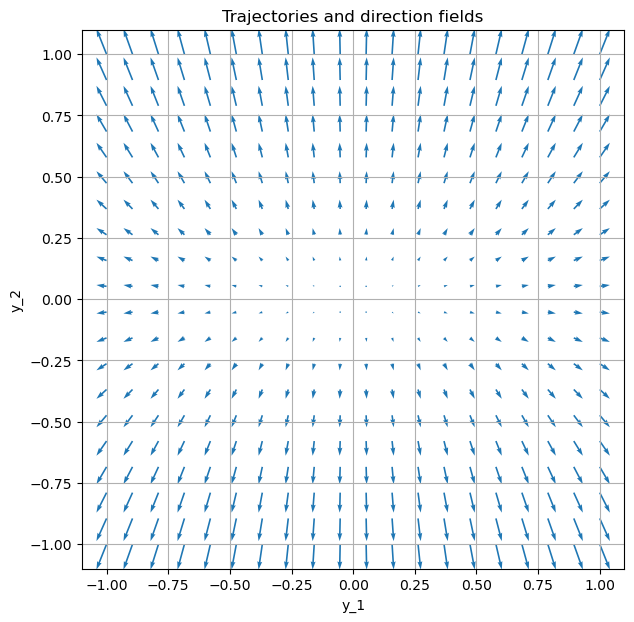

In [49]:
vField(-1, 1, -1, 1, dX_dt, Norm = False)

In [52]:
t = np.linspace(0, 2.0, 200)
X, infodict = solveODE(dX_dt, [0.5, 0.2], t)

y1, y2 = X.T
infodict['message']

'Integration successful.'

Text(0, 0.5, '$y_1, y_2$')

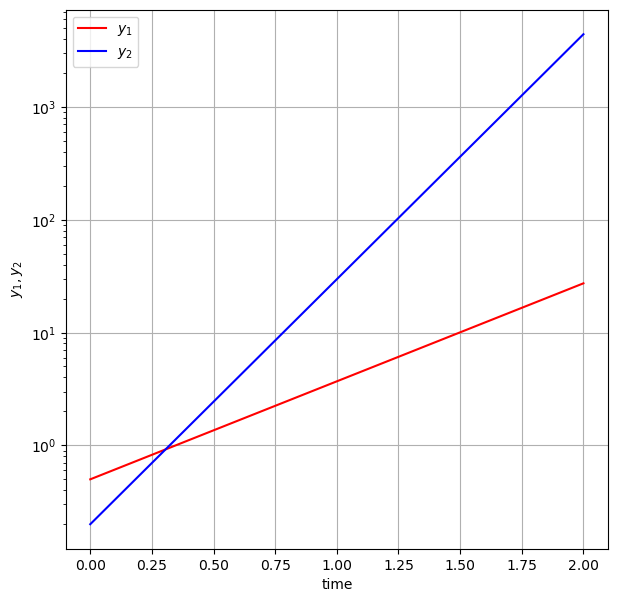

In [53]:
plt.semilogy(t, y1, 'r-', label='$y_1$')
plt.semilogy(t, y2  , 'b-', label='$y_2$')
plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('$y_1, y_2$')

## Saddle Point (eigenvalues with different signs)

In [54]:
A = np.array([[1., 3.], 
              [1., -1.]])
lm, u = lin.eig(A)
lm, u

(array([ 2.+0.j, -2.+0.j]),
 array([[ 0.9486833 , -0.70710678],
        [ 0.31622777,  0.70710678]]))

In [55]:
def dX_dt(X, t=0):
    return np.array([ 1.0 *X[0]  +  3.0*X[1] ,
                      1.0 *X[0]  + -1.0*X[1]  ])

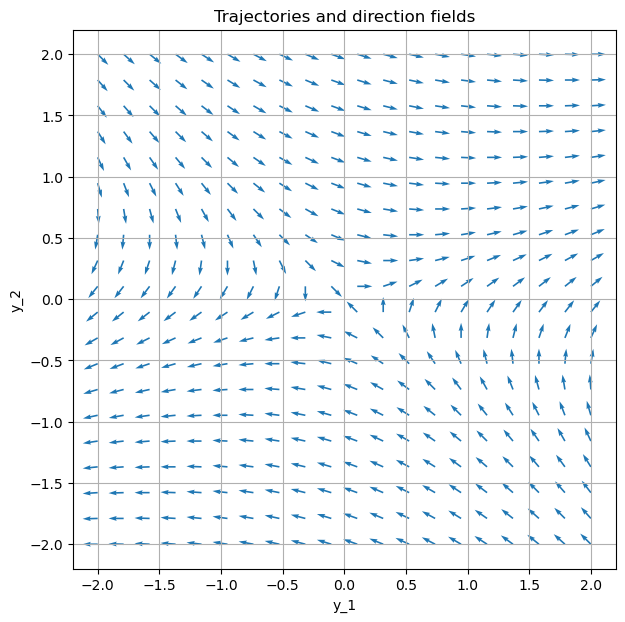

In [58]:
vField(-2, 2, -2, 2, dX_dt, Norm = True)

# Complex Solutions

In [39]:
a = 0. # damping
b = 5. # frequency

A = np.array([[a, b], 
              [-b, a]])
lm, u = lin.eig(A)
lm, u

(array([0.+5.j, 0.-5.j]),
 array([[0.        -0.70710678j, 0.        +0.70710678j],
        [0.70710678+0.j        , 0.70710678-0.j        ]]))

In [40]:
def dX_dt(X, t=0):
    return np.array([  a *X[0]  + b*X[1] ,
                      -b *X[0]  + a*X[1]  ])

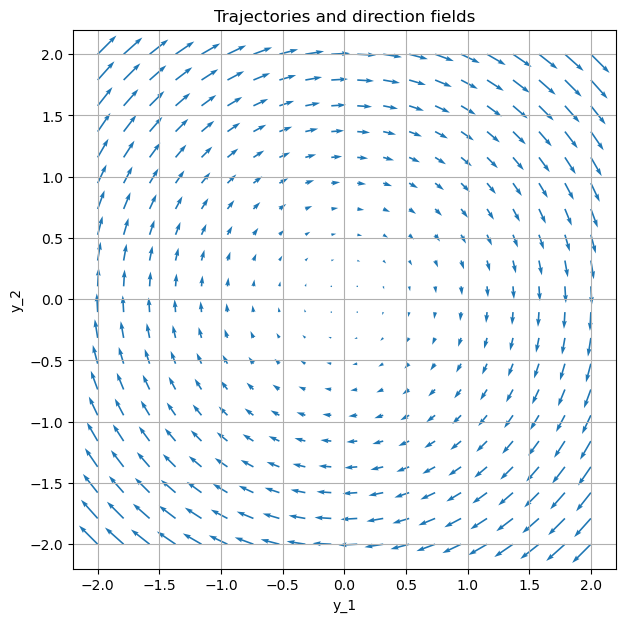

In [41]:
vField(-2, 2, -2, 2, dX_dt, Norm = False)

In [42]:
t = np.linspace(0, 10.0, 200)
X, infodict = solveODE(dX_dt, [0.5, 0.5], t)

y1, y2 = X.T
infodict['message']

'Integration successful.'

Text(0, 0.5, '$y_1, y_2$')

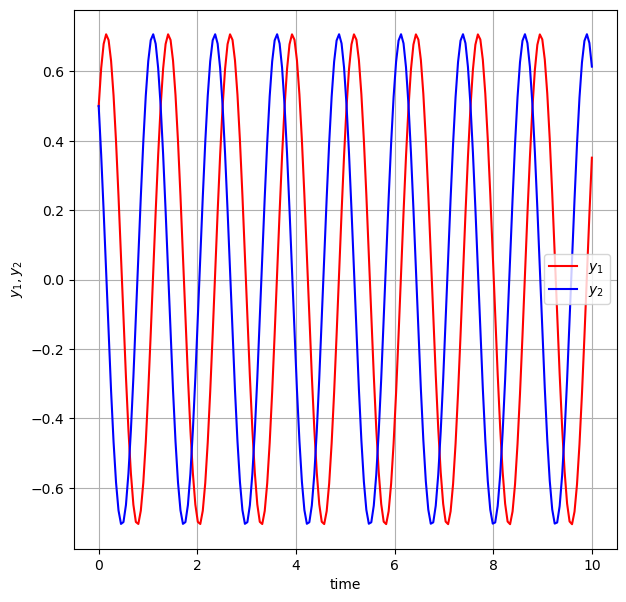

In [43]:
plt.plot(t, y1, 'r-', label='$y_1$')
plt.plot(t, y2  , 'b-', label='$y_2$')
plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('$y_1, y_2$')

We can also take a look at the energy $E$ of the system. Without an external force applied, it is

$$
E = \frac{1}{2}m x'^2
$$

Let's forget the constants, the $x'^2$ is interesting...

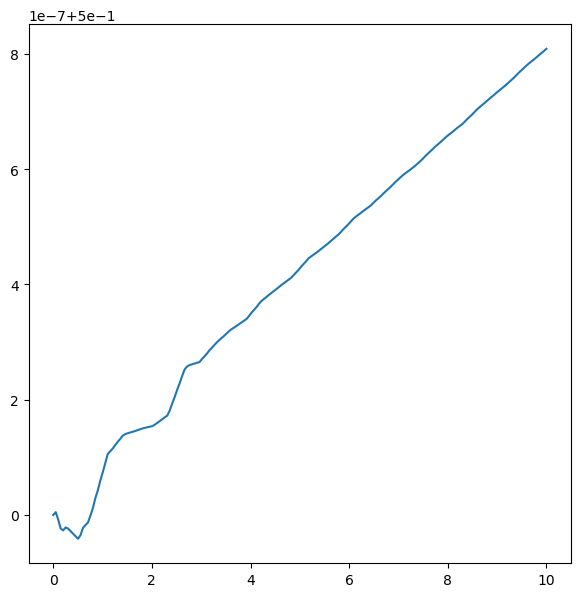

In [46]:
E = y1**2 + y2**2
plt.plot(t,E)

# Note: For a = 0 (no damping), the energy is constant - the figure is just badly scaled...

In [18]:
A = np.array([[2., 0.], 
              [0., 2.]])
lm, u = lin.eig(A)
lm, u

(array([2.+0.j, 2.+0.j]),
 array([[1., 0.],
        [0., 1.]]))

# Repeated Eigenvalues

In [112]:
A = np.array([[2., 1.], 
              [0., 2.]])
lm, u = lin.eig(A)
lm, u

(array([2.+0.j, 2.+0.j]),
 array([[ 1.0000000e+00, -1.0000000e+00],
        [ 0.0000000e+00,  4.4408921e-16]]))

In [113]:
def dX_dt(X, t=0):
    return np.array([  2.0 *X[0]  + 1.0*X[1] ,
                       0.0 *X[0]  + 2.0*X[1]  ])

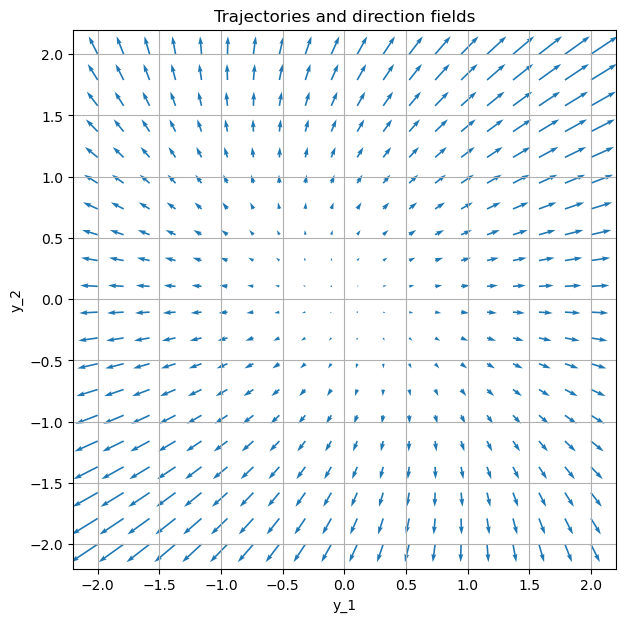

In [114]:
vField(-2, 2, -2, 2, dX_dt, Norm = False)

In [115]:
t = np.linspace(0, 10.0, 200)
X, infodict = solveODE(dX_dt, [0.5, 0.5], t)

y1, y2 = X.T
infodict['message']

'Integration successful.'

Text(0, 0.5, '$y_1, y_2$')

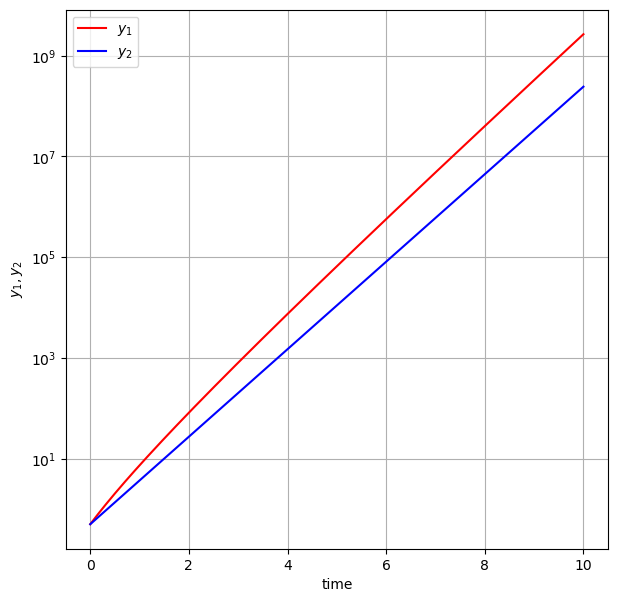

In [117]:
plt.semilogy(t, y1, 'r-', label='$y_1$')
plt.semilogy(t, y2  , 'b-', label='$y_2$')
plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('$y_1, y_2$')